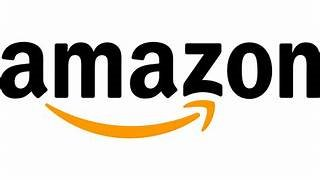

# Amazon Sales Data Analysis 

## Problem Statement :

- Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to 
reduce cost and to increase profits. Sales management today is the most important function in a commercial and business 
enterprise.
Perform some Data Analysis and Find key metrics and factors and show the meaningful relationships between attributes. 

### Importing all neccesary libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns

# %matplotlib inline is a command that enables Matplotlib plots to be displayed inline in Jupyter Notebook, instead of opening a separate window.
%matplotlib inline 

#  Using the pd.read_csv() function to read in a CSV file named "Amazon Sales Records.csv" and stores the data in a Pandas DataFrame named data. The encoding parameter is set to 'latin-1', which specifies the character encoding used in the CSV file.
data = pd.read_csv("Amazon Sales data.csv",encoding = 'latin-1')
     

In [2]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [4]:
# Show basic information of dataframe like null value count of each column and their data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
# changing the datatype of order date and ship date as date time format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [6]:
# getting basic stats for numerical data by using describe function
data[['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [7]:
# Creating different column to dataframe containg month, year and month wise year
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')


In [8]:
#data = data.drop(columns=['Order Date'])

In [9]:
df = data
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011,2011-07
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,11,2011,2011-11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,6,2016,2016-06
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,2015-07


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Region                100 non-null    object        
 1   Country               100 non-null    object        
 2   Item Type             100 non-null    object        
 3   Sales Channel         100 non-null    object        
 4   Order Priority        100 non-null    object        
 5   Order Date            100 non-null    datetime64[ns]
 6   Order ID              100 non-null    int64         
 7   Ship Date             100 non-null    datetime64[ns]
 8   Units Sold            100 non-null    int64         
 9   Unit Price            100 non-null    float64       
 10  Unit Cost             100 non-null    float64       
 11  Total Revenue         100 non-null    float64       
 12  Total Cost            100 non-null    float64       
 13  Total Profit         

In [11]:
#checking null values for all the ccolumns of the dataset
df.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order Date              0
Order ID                0
Ship Date               0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Order Month             0
Order Year              0
Order Date MonthYear    0
dtype: int64

In [12]:
# Display total values of all country 
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote d'Ivoir

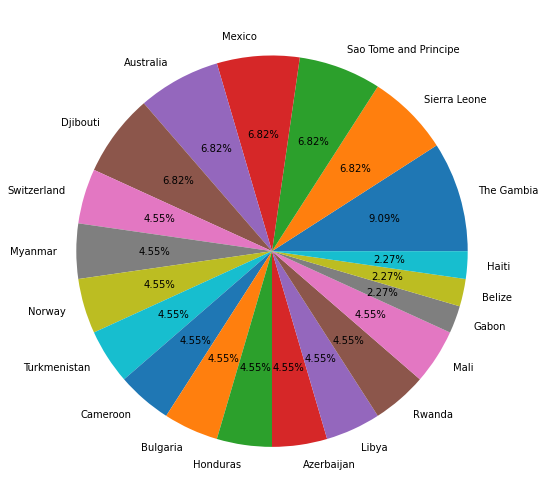

In [13]:
#Visualizing Top 20 Countries using pie chart

import matplotlib.pyplot as plt 
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values

fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

## Checking outliers in the Dataframe

### Box plot for Total Profit

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


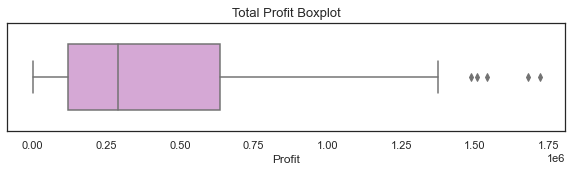

In [14]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Total Profit'], color="plum", width=.6)

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

In [15]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2 standard deviations
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(value)  # Append the value of the outlier
            # Optionally, you can print the outlier row:
            print(dataframe.loc[i])

    return outliers


In [16]:
 outliers = detect_outliers(df, df["Total Profit"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order Date                            2017-02-08 00:00:00
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtyp

In [17]:
# Print rows where outlier is present for the Total Profit column value
print(outliers)

# Print the number of values in the list
list_length = len(outliers)
print("The list has", list_length, "outliers in Total Profit column of dataframe data ")

[1487261.02, 1505888.07, 1367272.5, 1541705.29, 1719922.04, 1678540.98, 1375311.7]
The list has 7 outliers in Total Profit column of dataframe data 


### Box plot for Total Cost

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


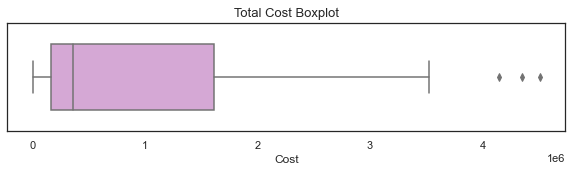

In [18]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Total Cost'], color="plum", width=.6)

plt.title('Total Cost Boxplot', fontsize=13)
plt.xlabel('Cost')
plt.show()

In [19]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2 standard deviations
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(value)  # Append the value of the outlier
            # Optionally, you can print the outlier row:
            print(dataframe.loc[i])

    return outliers


In [20]:
outliers = detect_outliers(df, df["Total Cost"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order Date                            2017-02-08 00:00:00
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtyp

In [21]:
# Print rows where outlier is present for the Total Profit column value
print(outliers)

# Print the number of values in the list
list_length = len(outliers)
print("The list has", list_length, "outliers in Total Cost column of dataframe data ")

[4509793.96, 4145955.0, 3521431.68, 4350343.52, 3494663.16]
The list has 5 outliers in Total Cost column of dataframe data 


### Box Plot for Total Revenue 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


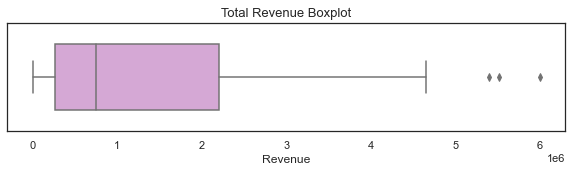

In [22]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Total Revenue'], color="plum", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [23]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2 standard deviations
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(value)  # Append the value of the outlier
            # Optionally, you can print the outlier row:
            print(dataframe.loc[i])

    return outliers

In [24]:
outliers = detect_outliers(df, df["Total Revenue"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order Date                            2017-02-08 00:00:00
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtyp

In [25]:
# Print rows where outlier is present for the Total Profit column value
print(outliers)

# Print the number of values in the list
list_length = len(outliers)
print("The list has", list_length, "outliers in Total Revenue column of dataframe data ")

[5997054.98, 5513227.5, 4368316.68, 5396577.27, 4324782.4, 4647149.58]
The list has 6 outliers in Total Revenue column of dataframe data 


### Box Plot for Unit Cost

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


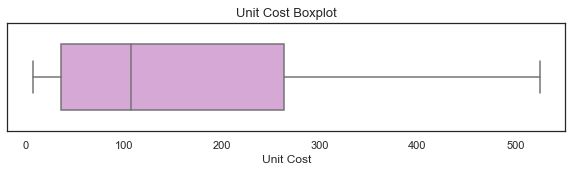

In [26]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Unit Cost'], color="plum", width=.6)

plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

### Box Plot for Unit Price

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


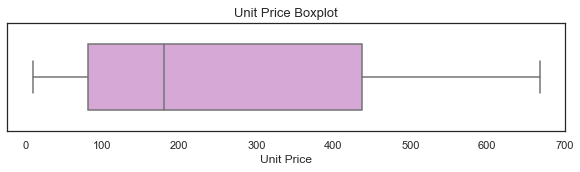

In [27]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Unit Price'], color="plum", width=.6)

plt.title('Unit Price Boxplot', fontsize=13)
plt.xlabel('Unit Price')
plt.show()

### Box Plot for Units Sold

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


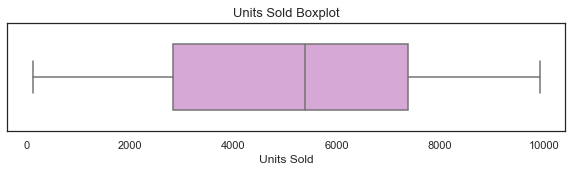

In [28]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Units Sold'], color="plum", width=.6)

plt.title('Units Sold Boxplot', fontsize=13)
plt.xlabel('Units Sold')
plt.show()

## Visualizing the Dataset using Plots

In [29]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02


## Year Wise Sales Trend

- In which year Amazon has made Maximum and Minimum Revenue ?



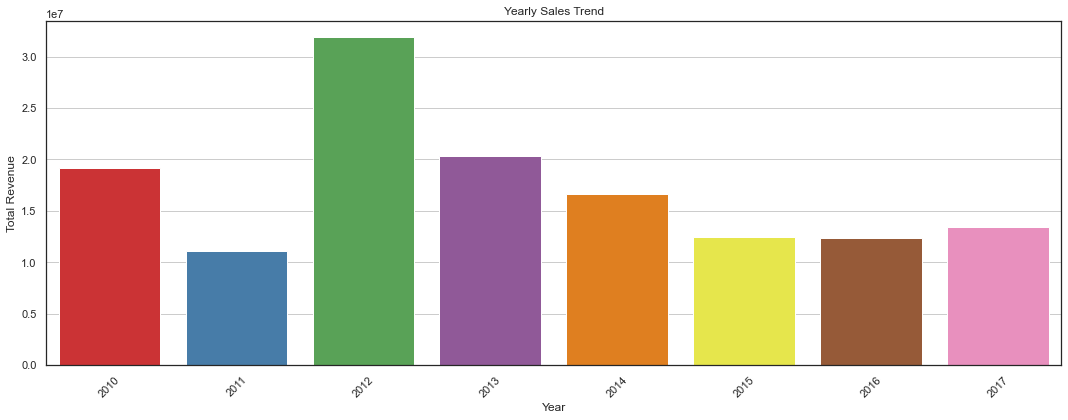

In [30]:
# Creating bar graph of the sales to see in which year the sales were the highest and lowest

yearly_sales = df.groupby('Order Year')['Total Revenue'].sum()

plt.figure(figsize=(15, 6))
sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette="Set1")
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()


- Output: From the above graph, we can clearly see that Amazon has made the Maximum Revenue in the year 2012 and the Minimum Revenue in 2011. It has been seen that there is significant increase in revenue in the year 2012 as compared to 2011 and this indicates that the year is a succesful year for Amazon as the substantial growth in the sales.

## Month Wise Sales Trend 

- In which month of the year the sales were the highest and lowest ?


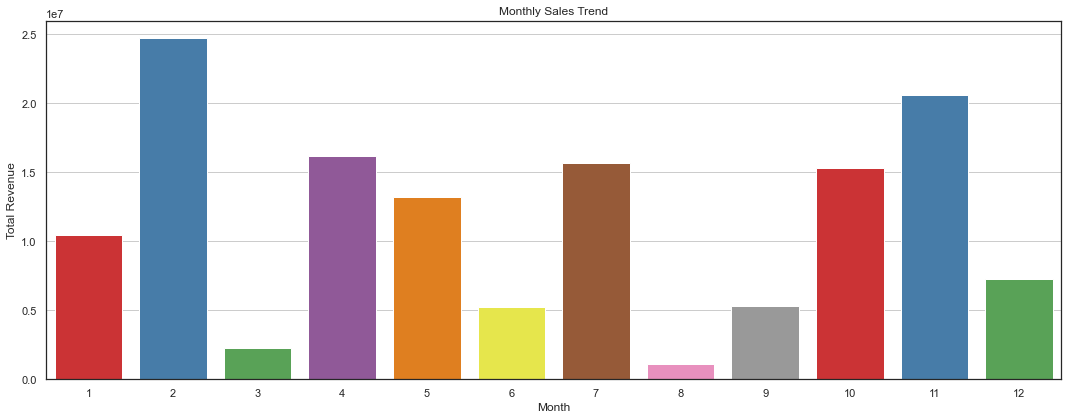

In [31]:
# Creating bar graph of the sales to see in which month of the year the sales were the highest and lowest

monthly_sales = df.groupby('Order Month')['Total Revenue'].sum()

plt.figure(figsize=(15, 6))
sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette="Set1")
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()


- Output: From the above graphs, we can see that Amazon has made the Maximum Revenue in the month of February 2012. On the other
hand the Minimum Revenue made is in the month of August 2011.

## Total Revenue by Region 

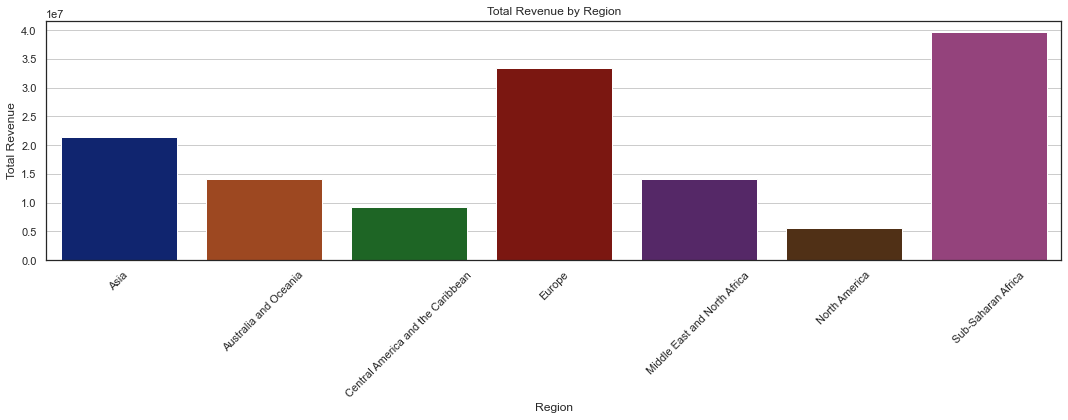

In [32]:
# Total Revenue by Region

total_revenue_by_region = df.groupby('Region')['Total Revenue'].sum()
plt.figure(figsize=(15, 6))
sns.barplot(x = total_revenue_by_region.index, y = total_revenue_by_region.values, palette="dark")
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

- By analyzing the above graph, Amazon generates the highest revenue from Sub-saharan Africa and Second highest is from Europe.
The least contribution for the revenue is from North America.

## Total Revenue by Sales Channel 

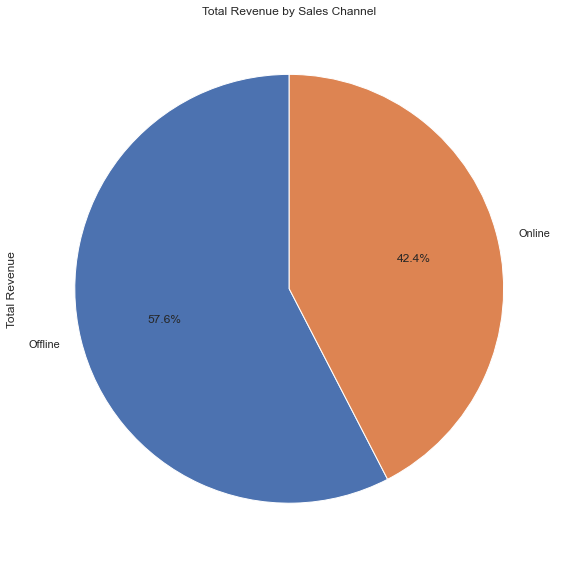

In [33]:
# Total Revenue by Sales Channel
total_revenue_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum()
plt.subplot(1, 2, 2)
total_revenue_by_channel.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(24, 8))
plt.title('Total Revenue by Sales Channel')
plt.tight_layout()

Text(0, 0.5, 'Total Revenue')

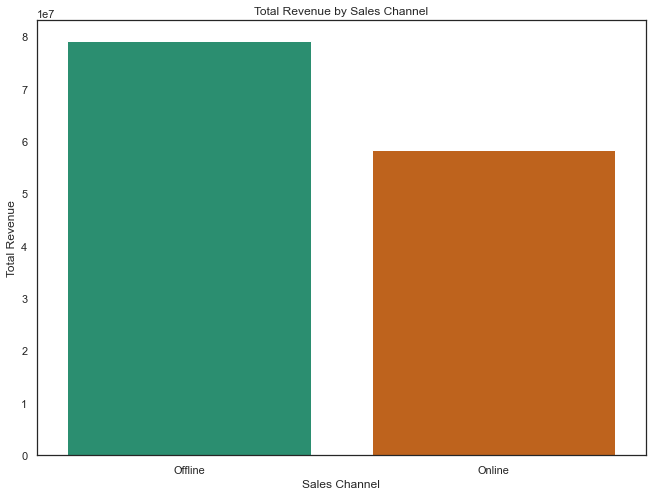

In [34]:
# Bar Graph for Total Revenue by Sales Channel
total_revenue_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum()
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
sns.barplot(x = total_revenue_by_channel.index, y = total_revenue_by_channel.values, palette="Dark2")
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')


- Output: From the above pie chart, it is seen that the Maximum percent of the Revenue is coming from Offline Channel i.e., 57.6% as compared to Online Channel.

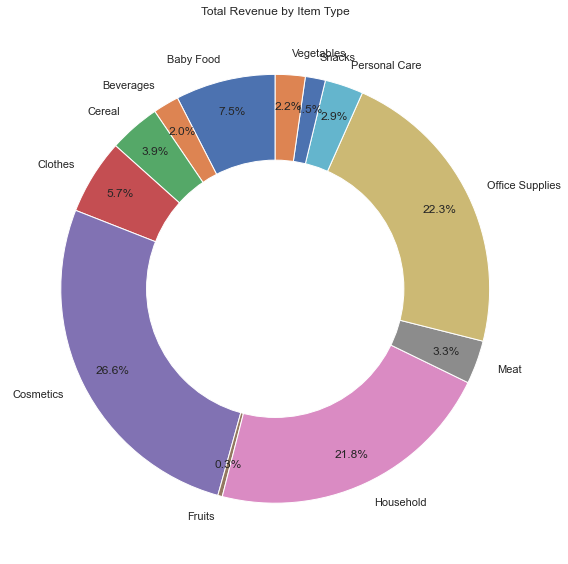

In [35]:
# Donut chart to show percentage of total revenue by each product item

total_revenue_by_item_type = df.groupby('Item Type')['Total Revenue'].sum()
plt.figure(figsize=(20, 8))

plt.pie(total_revenue_by_item_type, labels=total_revenue_by_item_type.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Total Revenue by Item Type')
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()

- From the above figure, the maximum revenue for item type is carried by Cosmetics i.e., 26.6%, followed by Office supplies and Household. Conversely, Snacks contributes the least to the amazon's revenue i.e., 1.5% .

## Total Profit by Region 

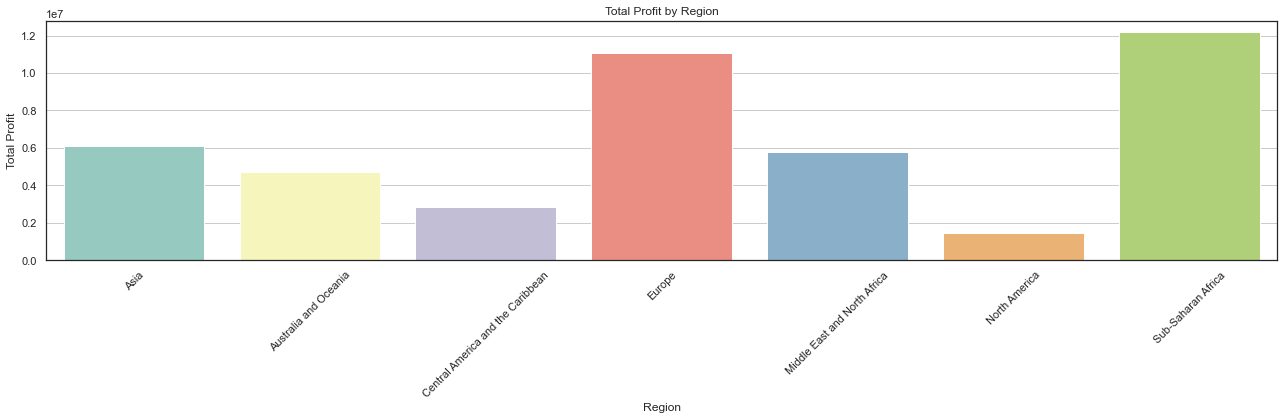

In [36]:
# Total Profit by Region

total_profit_by_region = df.groupby('Region')['Total Profit'].sum()
plt.figure(figsize=(18, 6))
sns.barplot(x = total_profit_by_region.index, y = total_profit_by_region.values, palette="Set3")
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

## Total Profit by Country 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Djibouti'),
  Text(1, 0, 'Myanmar'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'Samoa '),
  Text(4, 0, 'Honduras'),
  Text(5, 0, 'Iceland'),
  Text(6, 0, 'Azerbaijan'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Rwanda')])

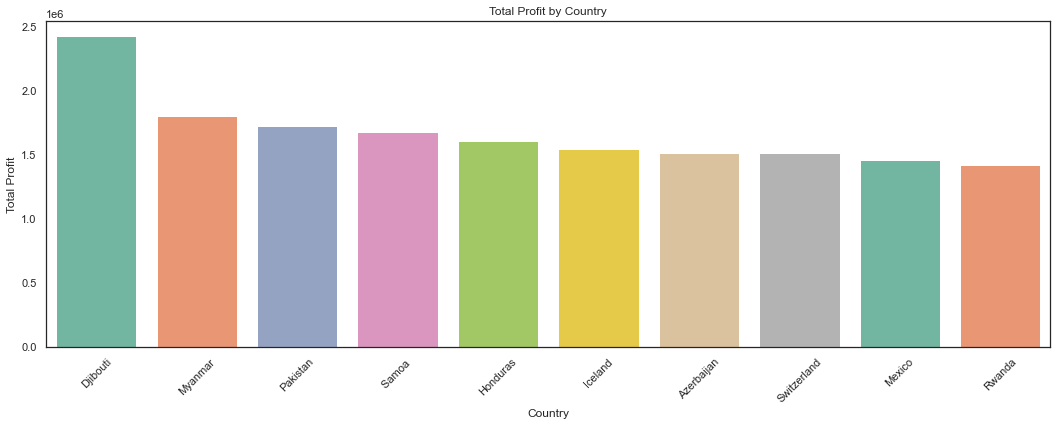

In [37]:
# Total Profit for top 10 Countries

total_profit_by_country = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(10) 
plt.figure(figsize=(18, 6))
sns.barplot(x = total_profit_by_country.index, y = total_profit_by_country.values, palette="Set2")
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Total Profit by Country')
plt.xticks(rotation=45)

- The graph shows the top 10 countries for the total profit. From the given graph of total profit by country, It can be seen that the country Djibouti has Highest total profit following by Myanmar and Pakistan. While the countries like Rwanda, Mexico and Switzerland shows the lowest profit. It might be because of the lowest sales or least selling price of the purchases.

## Total Profit by Sales Channel 

Text(0.5, 1.0, 'Total Profit by Sales Channel')

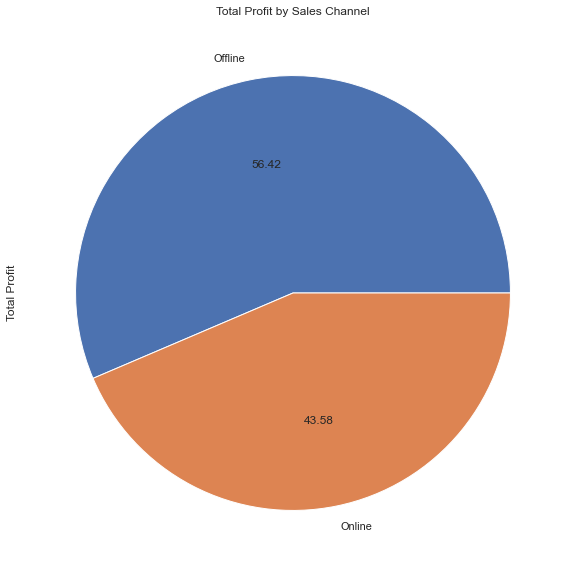

In [38]:
# Profit by Sales Channel

profit_by_sales_channel = df.groupby('Sales Channel')['Total Profit'].sum()
profit_by_sales_channel.plot.pie(autopct = "%1.2f", figsize=(20, 10))
plt.title('Total Profit by Sales Channel')

- The above figure shows the Total Profit for the Offline sales channel i.e., 56.42% rather than Online i.e., 43.58%

## Total units sold of each item type

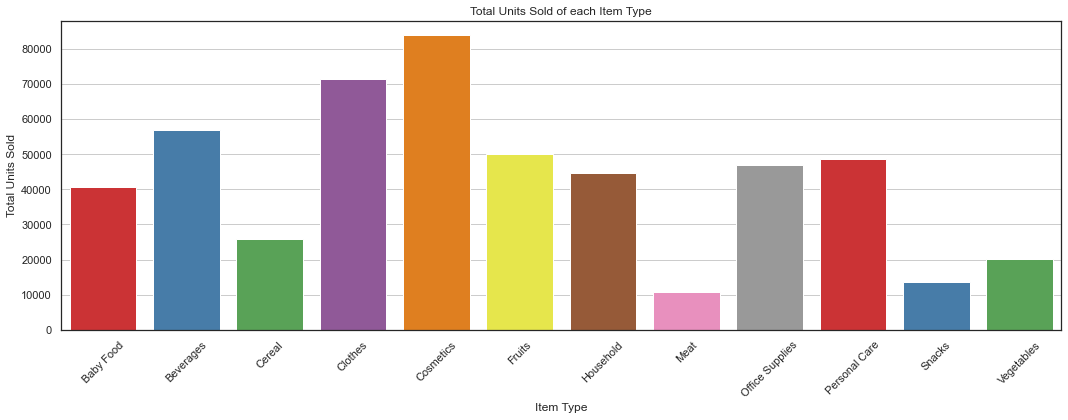

In [39]:
# Total units sold of each item type

total_units_sold_item_type = df.groupby('Item Type')['Units Sold'].sum()
plt.figure(figsize=(15, 6))
sns.barplot(x = total_units_sold_item_type.index, y = total_units_sold_item_type.values, palette="Set1")
plt.title('Total Units Sold of each Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

- From the above graph, most of the Units sold from the maximum Cosmetic item type followed by Clothes and Beverages. On the other hand least units sold from the item types are as Meat, Snacks and Vegetables. 

## Total units sold for each product item monthly 

<Figure size 2016x720 with 0 Axes>

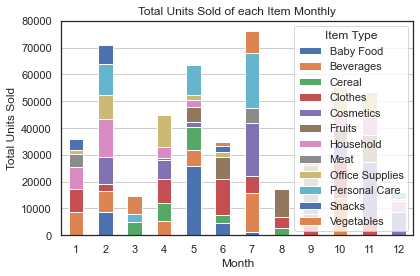

In [40]:
# Total units sold for each product item monthly

total_units_sold_monthly = df.groupby(['Order Month', 'Item Type'])['Units Sold'].sum().unstack()
plt.figure(figsize=(28,10))
total_units_sold_monthly.plot(kind='bar', stacked=True)
plt.title('Total Units Sold of each Item Monthly')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

- Within this graph we can easily visualize the maximum and the minimum units sold of each item monthly i.e., in which month which item sold more or less. Lets see the example for the maximum units sold in the month of July, from which most of the items sold are from 'Personal Care' followed by Cosmetics from any other type. Snacks are sold very less.

## Total Cost by Region 

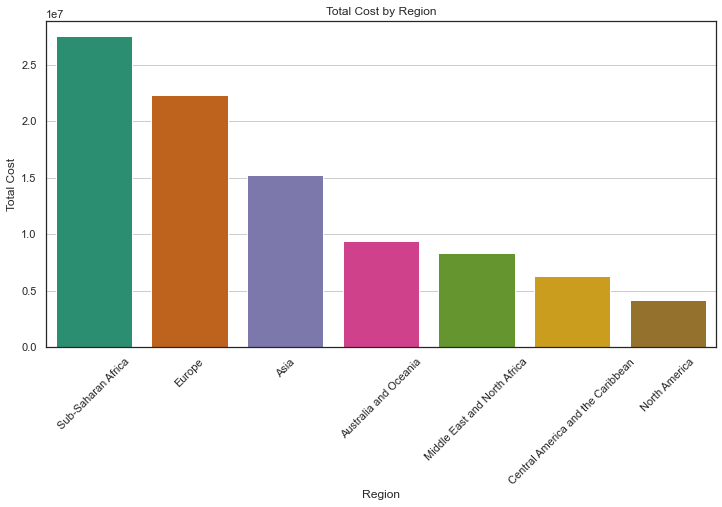

In [41]:
# Total cost by region
total_cost_by_region = df.groupby('Region')['Total Cost'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x = total_cost_by_region.index, y = total_cost_by_region.values, palette="Dark2")
plt.xlabel('Region')
plt.ylabel('Total Cost')
plt.title('Total Cost by Region')
plt.xticks(rotation=45)
plt.grid(axis='y')

- This graph clearly visualize that the region Sub-saharan Africa contains the highest cost followed by Europe and Asia.

## Total Cost by Country

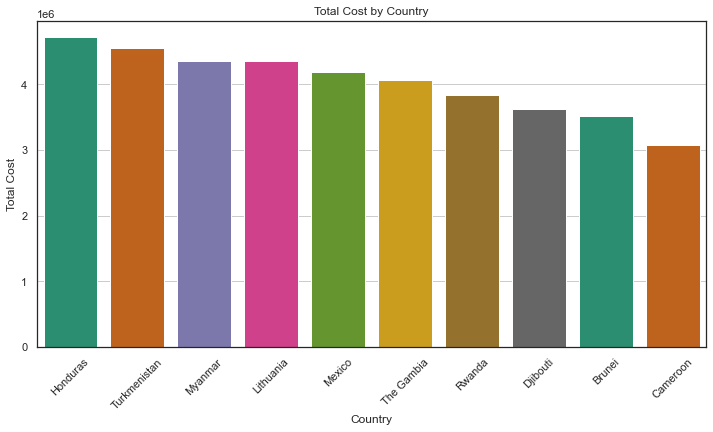

In [42]:
# Sum of total cost by country

total_cost_by_country = df.groupby('Country')['Total Cost'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x = total_cost_by_country.index, y = total_cost_by_country.values, palette="Dark2")
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.title('Total Cost by Country')
plt.xticks(rotation=45)
plt.grid(axis='y')

- Comparing with all the countries, the country which has highest total cost is 'Honduras' followed by Turkmenistan and Myanmar  and the countries which has the lowest costs are Cameroon, Brunei and Djibouti.

## Total Cost by Sales Channel 

<AxesSubplot:xlabel='Sales Channel'>

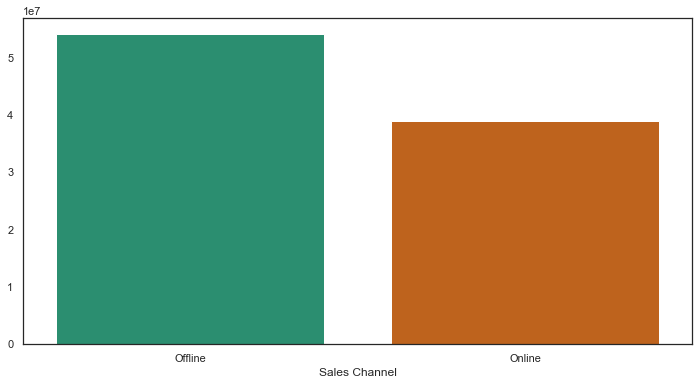

In [43]:
# Total cost by sales channel by using bar graph

total_cost_by_channel = df.groupby('Sales Channel')['Total Cost'].sum()
plt.figure(figsize=(12, 6))

sns.barplot(x = total_cost_by_channel.index, y = total_cost_by_channel.values, palette='Dark2')

- Offline sales channel contains the maximum total cost as compared to Online.

## Order Priority 

Text(0.5, 1.0, 'Order Priority')

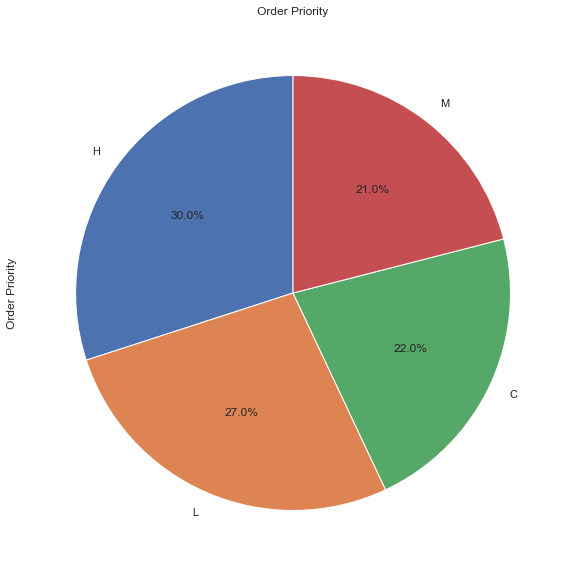

In [44]:
# Pie chart of Order priority

# H : High Priority
# L : Low Priority
# M : Medium Priority
# C : Critical Priority

order_priority = df['Order Priority'].value_counts()
order_priority.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(28, 10))
plt.title('Order Priority')

- From the above pie chart, the maximum counts of order priority are High followed by Low and critical.

In [54]:
#Saving the cleaned dataset to further analysis on Tableau.
#df.to_csv('C:\\Users\\Asus NB\\Downloads\\Amazon_sales_data_analysis\\Amazon_cleaned_data.csv', index=False) 

In [45]:
df.to_excel('C:\\Users\\Asus NB\\Downloads\\Amazon_sales_data_analysis\\Amazon_cleaned_data.xlsx', index=False)